# DS3000 Final Project: Classifying Songs based on Language
## Team 44

- anwar.m@northeastern.edu
- belfki.a@northeastern.edu
- dhawan.b@northeastern.edu
- kanodia.s@northeastern.edu
- schneiderman.a@northeastern.edu

#### Reuse Permissions

    The following may be re-used for any purposes:
    - all data included with submission
    - all images
    - this report and the notebooks which collected / cleaned the data
  
    Please attribute any work to the authors listed above.

# Executive Summary


The aim of our project was to create a song recommender model that is able to recommend songs based on the songs audio features as well as depending on whether the language of the songs matter to you or not (you can adjust weight accordingly). In other words, you could increase the alpha if you care about the recommended songs to be of the same language as your other songs or decrease it otherwise and based on that information, you are able to create a playlist of a length of your choice. 

This playlist is created using [K Nearest Neighbors](#Methods) (playlist length is the number of neighbors you specify) and essentially you will have a playlist with songs of similar audio features and of same/different languages depending on your preference. Our graph in the [results](#Results) section displays the difference of the k nearest neighbors song results when the weight of language is 0 versus when you increase the weight of the language which moves away the other languages and moves the sample size language songs closer.

For example, the first song we picked was in English and you are able to visually see all the non-english songs moving away from the sample point and all the english songs moving towards it because the KNN model is gathering songs of same features as well as same language (discussed and displayed further in [results](#Results) section). 

# Introduction

Spotify currently has no way to filter or recommend songs by language. This means that a user cannot use language as a feature when searching for songs to listen to. Our goal with this project is to create a model that when given a small selection of songs, can recommend new songs to listen to based on both Spotify's built in features and using information about the language of the given songs.

In our project, we created a dataset of songs on Spotify, enhanced with the values of Spotify's built in features for each given song and percentages of all of the different languages present on a line-by-line basis in each song. This dataset was made up of 1000 songs, taken from the top 200 trending from five countries -- India, Argentina, Morocco, France, and the US. We plan on using this data to create a classifier that will recommend songs based on both Spotify's built-in song features and languages present in a song. 

# Data Description

Web scraped the top 200 songs from 5 different markets (India, Argentina, Morocco, France, US) using the [Spotify Charts](https://spotifycharts.com/regional)

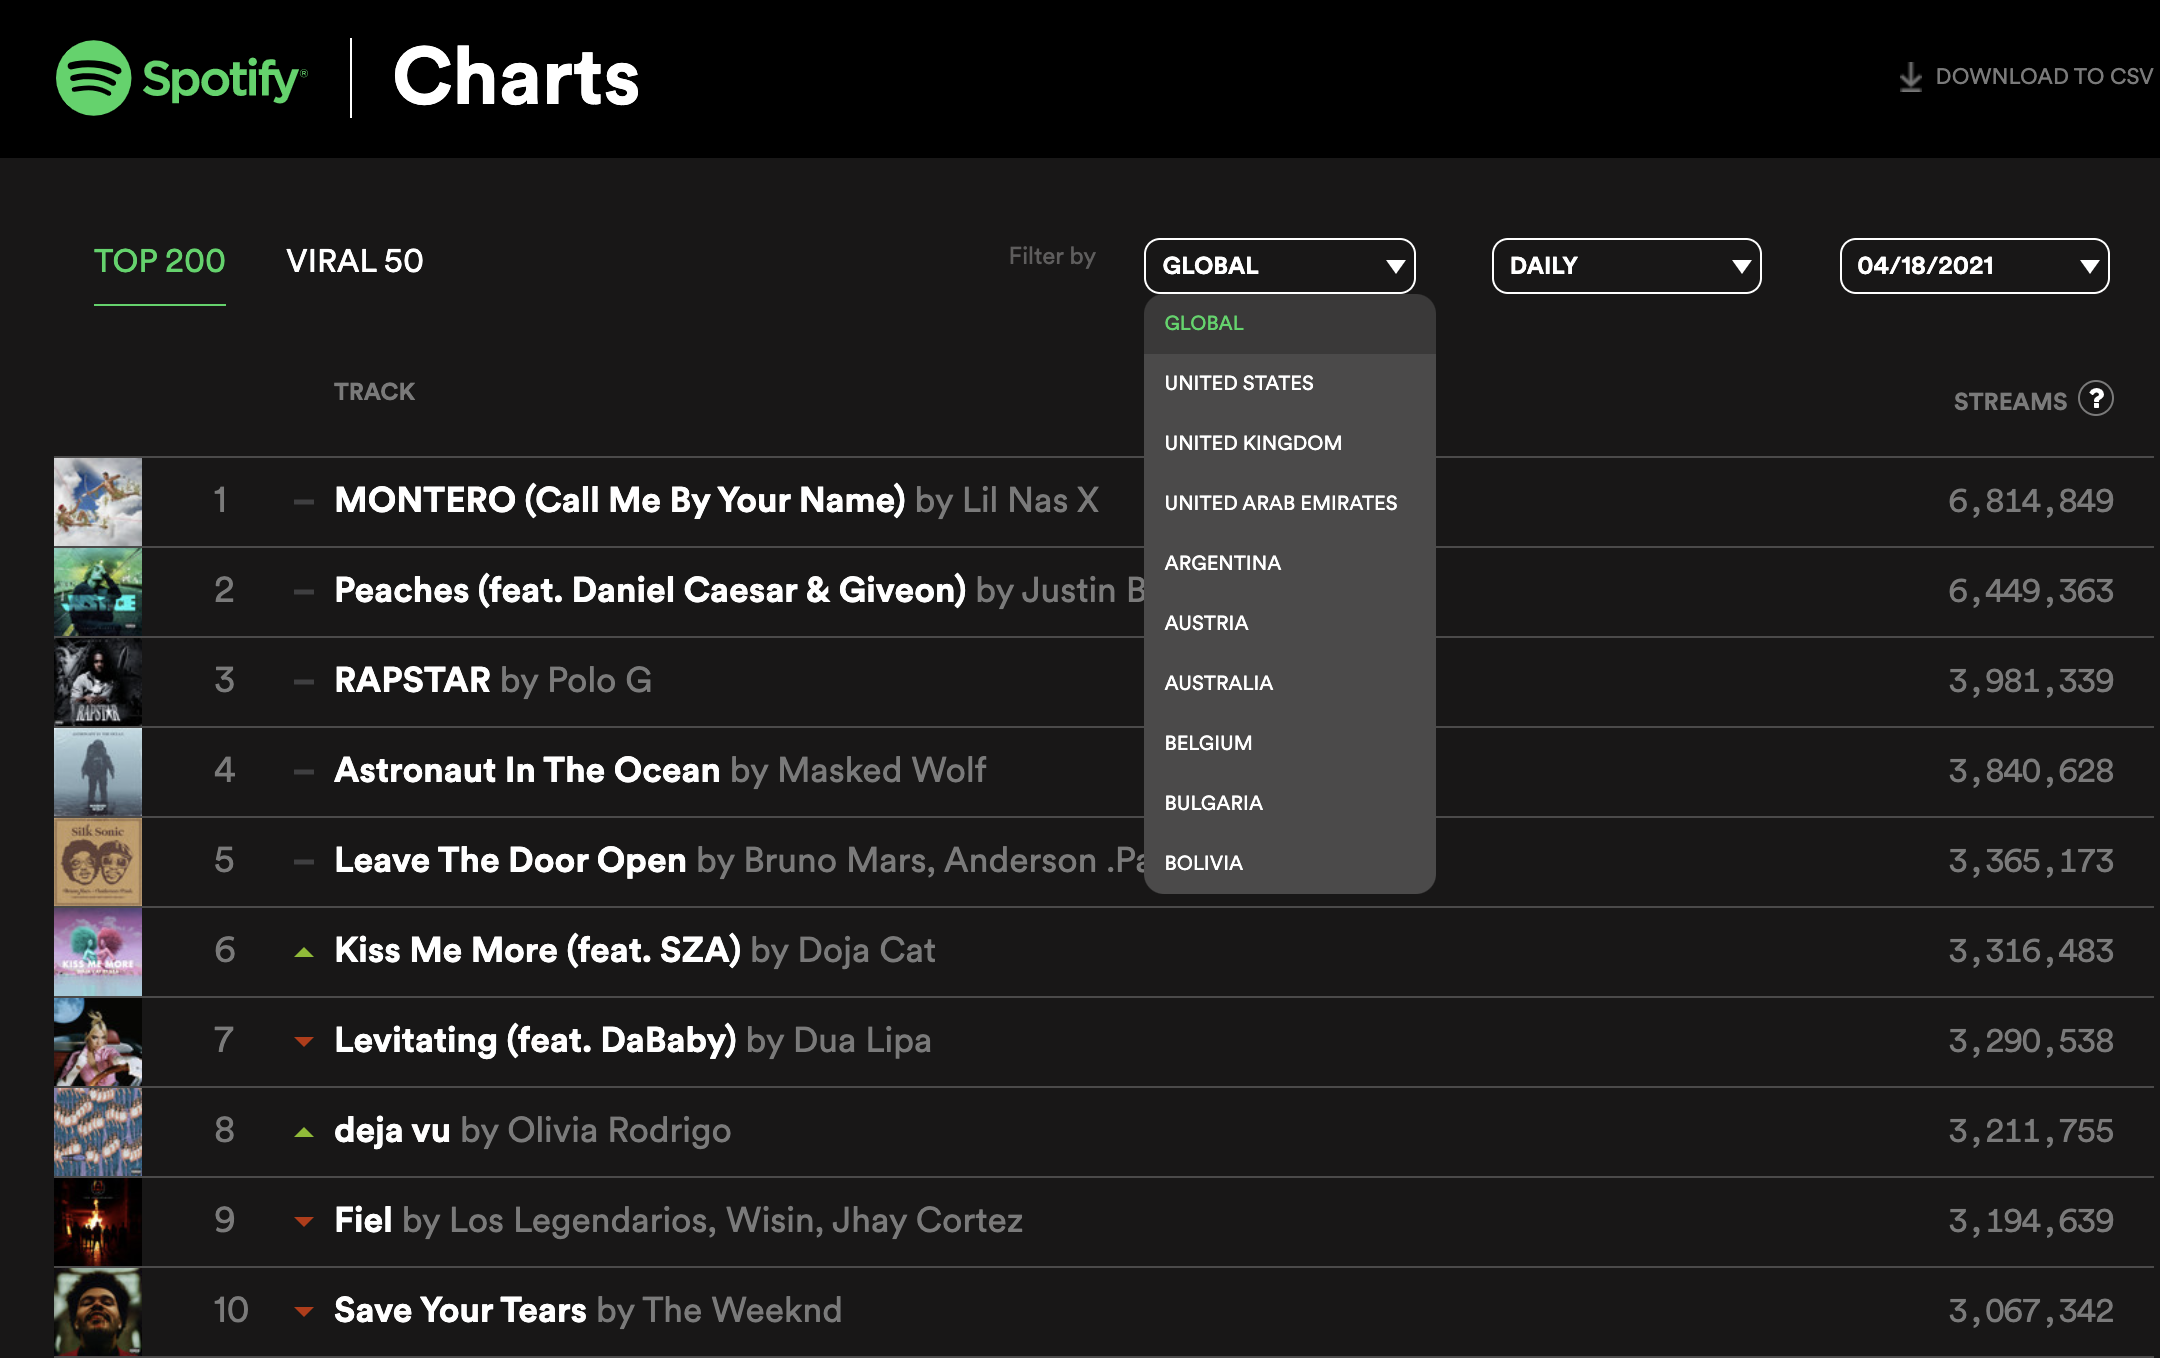

In [3]:
import pandas as pd

df_songs = pd.read_csv('final_all_songs.csv')
df_songs.drop(['Unnamed: 0'], axis=1, inplace=True)
df_songs.head()

,artist(s),track,market,release date,danceability,energy,loudness,mode,acousticness,speechiness,...,liveness,valence,tempo,duration_ms,time_signature,language,languages,lang 1,lang 2,lang 3
0,Lil Nas X,MONTERO (Call Me By Your Name),fr,1/14/21,0.610,0.508,-6.682,0,0.297,0.1520,...,0.3840,0.758,178.818,137876,4,en,"['en', 'tr']",0.976744,0.023256,0.000000
1,Gazo,HAINE&SEX,fr,1/14/21,0.774,0.583,-8.649,1,0.422,0.1690,...,0.1450,0.323,148.018,201427,4,fr,"['fr', 'ar', 'en']",0.959184,0.020408,0.020408
2,Naps,La kiffance,fr,1/14/21,0.806,0.637,-6.515,1,0.232,0.0881,...,0.0710,0.674,140.053,179427,4,fr,"['fr', 'en']",0.975610,0.024390,0.000000
3,Moha K,Vroum Vroum,fr,1/14/21,0.758,0.591,-7.749,0,0.556,0.0444,...,0.0847,0.550,116.992,186197,4,fr,"['fr', 'en', 'tl']",0.950820,0.032787,0.016393
4,Tayc,Le temps,fr,1/14/21,0.577,0.595,-6.084,1,0.108,0.1730,...,0.0759,0.633,201.892,197241,4,fr,"['fr', 'en', 'it']",0.769231,0.096154,0.076923


###  Sources:
(All code can be found in data analysis plan)

- `track`, `artist(s)`, `market`: 
   - [Spotify Top Trending](https://spotifycharts.com/regional)
   

- `release date`, `danceability`, `energy`, `loudness`, `mode`, `acousticness`, `speechiness`, `instrumentalness`, `liveness`, `valence`, `tempo`, `duration_ms`, `time_signature`: 
    - [Spotify API](https://developer.spotify.com/console/get-audio-features-several-tracks/)
    

- `language`, `languages`, `lang1`, `lang2`, `lang3`: 
    - Song lyrics scraped from [Genius](https://genius.com/)
    - Language identified from [Google Translate API](https://cloud.google.com/translate)

# Method

The main ML tool we intended to use was a K-nearest Neighbors classifier. We intended to model our implementation off of [Sci-Kit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

The goal of our project was to try to classify songs that are *most similar* to a specified language or features. Since the purpose of a KNN model is to find the K most similar objects to a given value, this makes this technique a good model for our task at hand. For example, if K = 2, it would return the *two* nearest vectors (or songs in this case) which represent the closest songs to the language and features in the given song.

How we intended to use this technique was to have all of the songs in a database act as individual vectors, where each feature is a value in the vector. All the songs would be represented in the vector space. The KNN would take a given song with its own vector feature values and locate the K-nearest neigbors using Euclidean distance. There are markdowns throughout the report to help guide the thought process behind each of the method steps and the steps to fix particular problems.


All limitations/pitfalls have been discussed further in the [discussion](#Discussion) section.

In [306]:
import pandas as pd

# df of all songs with audio and language features (top 3 most common languages in the song)
df_songs = pd.read_csv('final_all_songs.csv')
df_songs.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_songs.head(10)

,artist(s),track,market,release date,danceability,energy,loudness,mode,acousticness,speechiness,...,liveness,valence,tempo,duration_ms,time_signature,language,languages,lang 1,lang 2,lang 3
0,Lil Nas X,MONTERO (Call Me By Your Name),fr,1/14/21,0.610,0.508,-6.682,0,0.2970,0.1520,...,0.3840,0.758,178.818,137876,4,en,"['en', 'tr']",0.976744,0.023256,0.000000
1,Gazo,HAINE&SEX,fr,1/14/21,0.774,0.583,-8.649,1,0.4220,0.1690,...,0.1450,0.323,148.018,201427,4,fr,"['fr', 'ar', 'en']",0.959184,0.020408,0.020408
2,Naps,La kiffance,fr,1/14/21,0.806,0.637,-6.515,1,0.2320,0.0881,...,0.0710,0.674,140.053,179427,4,fr,"['fr', 'en']",0.975610,0.024390,0.000000
3,Moha K,Vroum Vroum,fr,1/14/21,0.758,0.591,-7.749,0,0.5560,0.0444,...,0.0847,0.550,116.992,186197,4,fr,"['fr', 'en', 'tl']",0.950820,0.032787,0.016393
4,Tayc,Le temps,fr,1/14/21,0.577,0.595,-6.084,1,0.1080,0.1730,...,0.0759,0.633,201.892,197241,4,fr,"['fr', 'en', 'it']",0.769231,0.096154,0.076923
5,Wejdene,Je t’aime de ouf,fr,1/14/21,0.623,0.346,-9.881,0,0.8960,0.0682,...,0.1160,0.185,84.621,169186,5,fr,['fr'],1.000000,0.000000,0.000000
6,Justin Bieber,Peaches (feat. Daniel Caesar & Giveon),fr,1/14/21,0.677,0.696,-6.181,1,0.3210,0.1190,...,0.4200,0.464,90.030,198082,4,en,['en'],1.000000,0.000000,0.000000
7,SCH,Mode Akimbo (feat. Jul),fr,1/14/21,0.875,0.848,-5.859,0,0.0717,0.1580,...,0.0828,0.577,122.983,217107,4,fr,"['fr', 'ar', 'en']",0.966102,0.016949,0.016949
8,"Naps, SCH",La danse des bandits,fr,1/14/21,0.830,0.676,-5.275,0,0.1850,0.0681,...,0.1050,0.576,135.023,174053,4,fr,"['fr', 'da', 'es']",0.857143,0.047619,0.047619
9,"Black Eyed Peas, Shakira",GIRL LIKE ME,fr,1/14/21,0.965,0.485,-8.784,1,0.0206,0.1910,...,0.0655,0.312,124.025,222523,4,en,"['en', 'es', 'ja']",0.609756,0.365854,0.012195


## Method Steps
<a id='Methods'></a>


1. **Scale Normalization**: to ensure all our features are scaled appropriately amongst all features to be able to compare them correctly
2. **Weighting features**: function to weight a specific feature group more over the other based on a specific alpha valuue
3. **Euclidean distance function**: to calculate the distance between points and then define the similarity between them
4. **K-Nearest Neighbors**: use a database in which the data points are separated into several columns to predict the classification of new sample points

In [2]:
columns = df_songs.columns.tolist()
audio_features = columns[4:16]
language_features = columns[18:]

### 1. Scale Normalization

In [3]:
def scale_normalization(data, cols):
    ''' Scale Normalizes all the specified columns from the dataframe
    
    Args:
        - data (pd.DataFrame): data collected
        - cols (list): list of column names to be scale normalized
    Returns:
        - df_normal (pd.DataFrame): each column has a variance of 1
    '''
    
    # copy the data
    data_copy = data.copy()
    
    # normalize data by dividing by std
    for col in cols:
        data_copy[col] = data_copy[col] / data_copy[col].std()
        
    # return the copy of data
    df_normal = data_copy
        
    return df_normal

In [4]:
df_songs_sn = scale_normalization(df_songs, audio_features + language_features)

### 2. Weighting the features

In [5]:
def weighting_cols(data, features_group1, features_group2, alpha):
    ''' weights the columns of a dataframe to make a group of features more important or significant 
    than the other group
    
    Args:
        - data (pd.DataFrame): data collected
        - features_group1 (list): list of names of the columns belonging to group 1
        - features_group2 (list): list of names of the columns belonging to group 2
        - alpha (float): parameter to modulate the weight of group 2
        
    Returns:
        - df_weighted (pd.DataFrame): dataframe of weighted columns
    '''
    
    # copy the data
    data_copy = data.copy()
    
    # use the weighted function for each feature
    for col in data_copy.columns:
        if col in features_group1:
            data_copy[col] = data_copy[col] / len(features_group1)
            
        if col in features_group2:
            # adjust a feature group by adjusting the weight (this is where we adjust the language weight)
            data_copy[col] = data_copy[col] / len(features_group2) * (alpha ** 0.5)
            
    # return copy of data
    df_weighted = data_copy
    
    return df_weighted

In [6]:
# weighted cols with different alpha values that are applied to the language features to give it
# weight accordingly
df_songs_alpha_0 = weighting_cols(df_songs_sn, audio_features, language_features, 0)
df_songs_alpha_half = weighting_cols(df_songs_sn, audio_features, language_features, 0.5)
df_songs_alpha_1 = weighting_cols(df_songs_sn, audio_features, language_features, 1)

### 3. Euclidean Distance Function

In [9]:
def euclidean_distance(point1, point2):
    ''' Calculates the euclidean distance between the two given data points
    
    Args:
        - point1 (list): data point 1 is a list of numerical values
        - point2 (list): data point 2 is a list of numerical values
        - weights (list): freatures weights
        
    Returns:
         - distance (float): distance value 
    '''
    
    distance = 0
    
    # apply euclidean distance formula
    for feat1, feat2 in zip(point1, point2):
        distance += ((feat1 - feat2) ** 2)
        
    distance = distance ** 0.5
    
    return distance

### 4. K-Nearest Neighbors Classifier

In [77]:
def string_to_list(lang_string):
    """ Convert a string of language codes to a list
    Args:
        - lang_string(str): the string of the language codes that need to be split
    
    Returns:
        -lang_list(list): list of the country codes
    """
    
    lang_string = lang_string.replace("'", '')
    lang_string = lang_string.replace(" ", "")
    
    # return a list of country codes
    lang_list = lang_string[1:len(lang_string)-1].split(',')
    
    return lang_list

In [ ]:
def build_language_dict(dict1, dict2):
    ''' Builds a language dict with the percent of song lyrics
    Args:
    
        - dict1 (dict): dict consisting of the language and its percentage in the song lyrics
        - dict2 (dict): dict consisting of the language and its percentage in the song lyrics
        
    Returns:
        - lang_dict (dict): dict consisting of the language and its percentage in both song lyrics
    '''
    
    # init empty dict
    lang_dict = dict()
    
    # add the keys together
    keys = list(dict1.keys()) + list(dict2.keys())
    
    # init empty keys list
    keys_clean = []
    
    # add all the keys to the empty key list
    [keys_clean.append(x) for x in keys if x not in keys_clean]
    
    # loop over keys
    for key in keys_clean:
        
        # init empty percent scores
        scores = []
        
        val_1 = 0
        
        # add the key from the dict 1
        if key in dict1.keys():
            val_1 = dict1[key]
        
        val_2 = 0
        
        # add the key from dict 2
        if key in dict2.keys():
            val_2 = dict2[key]
            
        # append both to the empty scores list
        scores.append(val_1)
        scores.append(val_2)
        
        # add the scores list to the dict
        lang_dict[key] = scores
    
    return lang_dict

In [76]:
sample_input = {'en': 1, 'es': 0.2338}
sample_input_2 = {'en': 23, 'pa': 0.3377}
build_language_dict(sample_input, sample_input_2)

{'en': [1, 23], 'es': [0.2338, 0], 'pa': [0, 0.3377]}

In [197]:
def clean_lang_val(row, sample):
    """ Builds one common dictionary given the row and the sample series
    Args:
        row(pd.Series): existing row of the dataframe
        sample(pd.Series): row of the dataframe with the sample data
    Returns:
        row_lang, sample_lang(tuple): returns the row and sample lang dataframe
    """
    
    # init the row and sample language to a list
    row_lang = row[['lang 1', 'lang 2', 'lang 3']].tolist()
    sample_lang = sample[['lang 1', 'lang 2', 'lang 3']].tolist()

    ## turn the languagues with their scores into dictionaries
    row_languages = string_to_list(row['languages'])
    sample_languages = string_to_list(sample['languages'])

    # init empty row dict
    row_dict = {}

    # loop over the row languages and row lang to convert the column of the dict to the value
    for name, val in zip(row_languages, row_lang):
        row_dict[name] = val

    # init empty sample dict
    sample_dict = {}

    # loop over the sample languages and sample lang to convert the column of the dict to the value
    for name, val in zip(sample_languages, sample_lang):
        sample_dict[name] = val

    ## come up with one common dictionary
    common_dict = build_language_dict(row_dict, sample_dict)

    ## then seperate the values again and append to the list of audio features
    row_lang = []
    sample_lang = []

    # appen the values from the common dictionary
    for val in common_dict.values():
        row_lang.append(val[0])
        sample_lang.append(val[1])
        
    return row_lang, sample_lang

In [196]:
def KNearestNeighbors(data, sample, k, cols):
        ''' k nearest neighbors from the data set to the given sample point
        
        Args:
            - data (pd.DataFrame): dataset of points not used to generate the sample point
            - sample (pd.Series): sample point to perform classification
            - k (int): number of nearest neighbors to obtain
            - weights (list): list of features' weights to use in the distance calculation
            - cols (list): list of column names to perform KNN on
            
        Returns:
            - neighbors (pd.DataFrame): dataframe of the k closest points to the sample points
        '''
        # copy the data frame
        data_copy = data.copy()
        
        # init empty neighbors dataframe
        neighbors = pd.DataFrame()
        
        # init neighbors index
        neighbors_idx = []
        
        # all audio features
        audio_features = ['danceability', 'energy', 'loudness', 'mode', 'acousticness', 'speechiness', 'instrumentalness', 
                          'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'] 
        
        # all language features (top 3 dominant languages)
        language_features = ['lang 1', 'lang 2', 'lang 3']
        
        # convert the sample containing audio features to a list
        sample_audio = sample[audio_features].tolist()
        
        while k > 0:
            
            ## nearest neighbor is a dictionary of 
            ## the index of the row with the smallest distance to the sample point
            ## and the distance of this row from the sample point
            nearest_neighbor = {'idx': 0, 'row': None, 'dist': float('inf')}
            
            # loop over every row
            for idx, row in data_copy.iterrows():
                
                # clean the language values by creating a tuple of row and sample
                clean_langs = clean_lang_val(row, sample)
                
                # convert the row with audio features to a list
                row_clean = row[audio_features].tolist() + clean_langs[0]
                
                # add the sample and clean sample 
                sample_clean = sample_audio + clean_langs[1]
                
                # pass in the sample and row data to the eucledian distance formula
                row_dist = euclidean_distance(sample_clean, row_clean)
                
                # check the value of the dist and if the distance is less than the nearest neighbor, then
                # add the to the column of nearest neighbor
                if (row_dist < nearest_neighbor['dist']) and (idx not in neighbors_idx) and (row_dist != 0.0):
                    nearest_neighbor['idx'] = idx
                    nearest_neighbor['row'] = row
                    nearest_neighbor['dist'] = row_dist
                    
            # append the indices of the nearest neighbor
            neighbors_idx.append(nearest_neighbor['idx'])
            
            # conver the row to a dictionary
            neighbor_dict = nearest_neighbor['row'].to_dict()
            
            # create a dataframe with the dictionary and indices
            df_neighbor = pd.DataFrame(neighbor_dict, index=[nearest_neighbor['idx']])
                    
            # append the neigbors to dataframe
            neighbors = neighbors.append(df_neighbor, ignore_index=True)
            
            # set the values to default and return the neighbors
            nearest_neighbor['idx'] = 0
            nearest_neighbor['row'] = None
            nearest_neighbor['dist'] = float('inf')
            
            k -= 1
            
            
        return neighbors

In [87]:
print(audio_features + language_features)

['danceability', 'energy', 'loudness', 'mode', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'lang 1', 'lang 2', 'lang 3']


# Results 
<a id='Results'></a>


#### Witnessing the role of language features in the recommendation of similar songs

1.  Choose a sample
2.  Generate k-nearest neighbors with the audio features
3. Plot the sample and it's recommendation with the sample as the origin and the recommendation rotate over it with the radius being it's euclidean distance
4. Do step 2 and 3 with the audio and language features together

### Alpha 0
- Passing in a dataframe with 0 alpha (meaning, no weight given to language features)
- Input a sample song
- Creating a dataframe which contains songs that are similar to the inputed song sample
- Essentially creates a song "playlist" of length based on the amount of neighbors specified
- Takes into account the audio and language features and performs KNN on it

In [92]:
song_recommendations = KNearestNeighbors(df_songs_alpha_0, song_sample, 5, audio_features + language_features)

In [93]:
song_recommendations

,artist(s),track,market,release date,danceability,energy,loudness,mode,acousticness,speechiness,...,liveness,valence,tempo,duration_ms,time_signature,language,languages,lang 1,lang 2,lang 3
0,"Papichamp, L-Gante, Blunted Vato, Ecko",Combi Nueva,ar,1/14/21,0.455396,0.322426,-0.189507,0.166558,0.127118,0.104648,...,0.251111,0.250188,0.268966,0.322180,1.082831,es,"['es', 'it', 'tl']",0.0,0.0,0.0
1,"Anys, Dizzy DROS",Kobe,ma,1/14/21,0.438254,0.397519,-0.155915,0.166558,0.024342,0.042968,...,0.243854,0.212382,0.258155,0.378875,1.082831,en,"['en', 'ar', 'bn']",0.0,0.0,0.0
2,BTS,Life Goes On,in,1/14/21,0.323405,0.375989,-0.162107,0.166558,0.002336,0.029385,...,0.268529,0.166792,0.217860,0.348157,1.082831,ko,"['ko', 'en', 'ar']",0.0,0.0,0.0
3,Rauw Alejandro,Enchule,ar,1/14/21,0.435969,0.349732,-0.093764,0.166558,0.051726,0.134448,...,0.218452,0.217571,0.242095,0.311640,1.082831,es,"['es', 'en', 'nl']",0.0,0.0,0.0
4,Harry Styles,Watermelon Sugar,fr,1/14/21,0.313120,0.428501,-0.119014,0.166558,0.041246,0.032226,...,0.243128,0.206452,0.256349,0.291976,1.082831,en,['en'],0.0,0.0,0.0


In [243]:
def list_duplicated(list_str,num):
    """ Duplicate items in a list based on the number and sort in order
    Args:
    list_str(list): list containing items you want to duplicate
    num(int): amount of duplicates per each item
    Return:
    result(list): items duplicated based on the num
    """
    
    result = []
    
    for element in list_str:
        for ii in range(0, num):
            result.append(element)
    
    return result

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from functools import reduce
from operator import concat


sns.set(font_scale = 1.3)

def plot_recommendations(recs, sample):
    ''' plots the song recommendations using KNN after performing matrix rotation 
    
    Args :
        recs (pd.Dataframe) : complete recommendations from before and after with the language features 
        sample (pd.Series) :  a sample song to use as a reference to get recommentations
        
    Returns :
        plot of the song recommendations
    '''
    
    ## calculates the distance between the sample point and each recommendation
    
    # init list euclidean distances
    dists = []
    
    # init list of distances with corresponding indices
    distances = []
    
    # list of audio features
    audio_features = ['danceability', 'energy', 'loudness', 'mode', 'acousticness', 'speechiness', 'instrumentalness', 
                          'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'] 
        
    # list of three most predominant language features
    language_features = ['lang 1', 'lang 2', 'lang 3']
    
    # gets the unique tracks
    unique_tracks = recs['track'].unique().tolist()
    
    # loop over all the tracks
    for track in unique_tracks:
        unique_songs = recs[recs['track'] == track]
        
        # temporary list to sort the distances
        temp_dists = []
        
        # loop over all the songs
        for idx, row in unique_songs.iterrows():
            
            # cleans and comes up with a common dictionary for the rows and samples
            clean_langs = clean_lang_val(row, sample) 
            
            # clean each row
            row_clean = row[audio_features].tolist()+ clean_langs[0]
            
            # clean each column
            sample_clean = sample[audio_features].tolist()+ clean_langs[1]
            
            # get and store he euclidean distances for each sample
            dist = euclidean_distance(sample_clean, row_clean)
            
            # add to temporary list
            temp_dists.append(dist)
        
        # add to list of euclidean distances
        dists.append([temp_dists[0], temp_dists[1]])
        
        # add to list of distances with corresponding song indices
        distances.append([(temp_dists[0], 0), (temp_dists[1], 0)])
        
    ## rotates the points
    
    # looping over half the length to avoid getting both the before and after
    num = int(recs.shape[0] / 2)
    
    # gets angle of rotation in degrees
    angle = 360 / num
    
    # looping over half the length to avoid duplicates
    for ii in range(0, num):
        # gets angle of rotation in radians
        pos_angle = math.radians(angle * ii)
        
        # rotates the matrix
        rot_matrix = np.array([[math.cos(pos_angle), - math.sin(pos_angle)],
                               [math.sin(pos_angle), math.cos(pos_angle)]])
        
        # vectors representing matrix before rotation
        vec_1 = np.array([distances[ii][0][0], distances[ii][0][1]])
        vec_2 = np.array([distances[ii][1][0], distances[ii][1][1]])
        
        # vectors representing matrix after rotation
        new_vec1 = np.matmul(rot_matrix, vec_1)
        new_vec2 = np.matmul(rot_matrix, vec_2)
        
        # gets and stores the euclidean distances of the new vectors
        distances[ii] = [(new_vec1[0], new_vec1[1]), (new_vec2[0], new_vec2[1])]

    ## plotting the points
    
    # converts list of lists to a list
    distances_reduced = reduce(concat, distances)
    
    # x coordinates
    x = [dist[0] for dist in distances_reduced]
    
    # y coordinates
    y = [dist[1] for dist in distances_reduced]
    
    x.insert(0, 0.0)
    
    y.insert(0, 0.0)
    
    # converts to a list of languages
    languages = recs['language'].tolist()
    languages_half = languages[0:num]
    languages = list_duplicated(languages_half, 2)
    
    # inserts the corresponding sample languages
    languages.insert(0, sample['language'])
    
    # dictionary of corresponding coordinates
    coord_dict = {'x': x, 'y': y, 'lang': languages}
    
    # dataframe of corresponding coordinates
    df_coord = pd.DataFrame(coord_dict)
    sns.scatterplot(data = df_coord, x='x', y = 'y', hue = 'lang', s = 150)
    
    # loop control variable
    counter = 0
    # loop over all songs and corresponding distances in recommendations
    for song, dist in zip(distances, dists):
        
        # plots the songs before and after considering the language features
        if (counter + 1 == len(distances)):
            plt.plot([0, song[0][0]], [0, song[0][1] + 0.05], color = 'r', linestyle = '--', linewidth = 3.5, label = 'before')
            plt.plot([0, song[1][0]], [0, song[1][1] - 0.05], color = 'black', linestyle = '--', linewidth = 3.5, label = 'after')
        
        # plots the songs recommendations after increasing y-components to prevent overlap
        elif counter < round(num / 2) + 1:
            plt.plot([0, song[0][0]], [0, song[0][1] + 0.05], color = 'r', linestyle = ':', linewidth = 3.5)
            plt.plot([0, song[1][0]], [0, song[1][1] - 0.05], color = 'black', linestyle = ':', linewidth = 3.5)
            
          
        # plots the songs recommendations after increasing y-components to prevent overlap
        else:
            plt.plot([0, song[0][0]], [0, song[0][1] + 0.05], color = 'r', linestyle = '--', linewidth = 3.5)
            plt.plot([0, song[1][0]], [0, song[1][1] - 0.05], color = 'black', linestyle = '--', linewidth = 3.5)
        counter += 1
        
    # reduces list of list to list of distances
    dists_reduced = reduce(concat, dists)
    
    for xx, yy, ii in zip(x[1:],y[1:], range(0, num * 2)):

        label = "{:.4f}".format(dists_reduced[ii])

        plt.annotate(label, # this is the text
                 (xx,yy), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', fontsize=9)
    
    # the range of x-axis
    max_val = max(x)
    min_val = min(x)
    
    if abs(min_val) > max_val:
        max_val = - min_val 
    
    # limit of x-axis
    plt.xlim(- max_val - 0.5, max_val + 0.5)
    
    plt.gcf().set_size_inches(20, 20)
    
    plt.legend()

### Alpha 1
Repeating the same process as alpha 0 but instead passing in df songs with alpha value of 1 to determine if the recommended songs are different, now that we explicitly want songs of the same language as the sample point.

In [94]:
song_recommendations_lang = KNearestNeighbors(df_songs_alpha_1, song_sample_2 , 5, audio_features + language_features)

In [95]:
song_recommendations_lang

,artist(s),track,market,release date,danceability,energy,loudness,mode,acousticness,speechiness,...,liveness,valence,tempo,duration_ms,time_signature,language,languages,lang 1,lang 2,lang 3
0,Harry Styles,Watermelon Sugar,fr,1/14/21,0.313120,0.428501,-0.119014,0.166558,0.041246,0.032226,...,0.243128,0.206452,0.256349,0.291976,1.082831,en,['en'],2.010280,0.000000,0.0
1,Taylor Swift,Fearless (Taylor’s Version),us,1/14/21,0.325119,0.389117,-0.140335,0.166558,0.004125,0.019544,...,0.241677,0.159379,0.269055,0.405396,1.082831,en,['en'],2.010280,0.000000,0.0
2,"Drake, WizKid, Kyla",One Dance,in,1/14/21,0.452539,0.328202,-0.158601,0.166558,0.002623,0.037147,...,0.238774,0.137140,0.279399,0.291954,1.082831,en,"['en', 'el']",1.979821,0.055627,0.0
3,Ariana Grande,34+35,us,1/14/21,0.474251,0.307197,-0.183116,0.166558,0.080125,0.065145,...,0.179987,0.179765,0.295552,0.291491,1.082831,en,"['en', 'da']",1.980717,0.053991,0.0
4,Journey,Don't Stop Believin',us,1/14/21,0.285694,0.392793,-0.256521,0.166558,0.042936,0.025157,...,0.324413,0.190514,0.319400,0.421161,1.082831,en,['en'],2.010280,0.000000,0.0


### Interpreting the dataframes: Alpha 0 vs. Alpha 1
Referring to the table below, we can see that the first 5 songs (where the language values are 0 since alpha is 0) we are giving no importance to the language of songs and so the KNN model is recommending songs that are in Spanish and Korean as well. 

However, for the remaining songs, we increase the weight of the languages (alpha is equal to 1) and we can see that our KNN model now only returned songs that are in English, just like the language of our sample point.

This shows that our model is working since by increasing the weight of the features, our model did, indeed give us song recommendations based on similar audio features as well as language.

In [111]:
song_recommendations_before_after = song_recommendations.append(song_recommendations_lang, ignore_index=True)
song_recommendations_before_after

,artist(s),track,market,release date,danceability,energy,loudness,mode,acousticness,speechiness,...,liveness,valence,tempo,duration_ms,time_signature,language,languages,lang 1,lang 2,lang 3
0,"Papichamp, L-Gante, Blunted Vato, Ecko",Combi Nueva,ar,1/14/21,0.455396,0.322426,-0.189507,0.166558,0.127118,0.104648,...,0.251111,0.250188,0.268966,0.322180,1.082831,es,"['es', 'it', 'tl']",0.000000,0.000000,0.0
1,"Anys, Dizzy DROS",Kobe,ma,1/14/21,0.438254,0.397519,-0.155915,0.166558,0.024342,0.042968,...,0.243854,0.212382,0.258155,0.378875,1.082831,en,"['en', 'ar', 'bn']",0.000000,0.000000,0.0
2,BTS,Life Goes On,in,1/14/21,0.323405,0.375989,-0.162107,0.166558,0.002336,0.029385,...,0.268529,0.166792,0.217860,0.348157,1.082831,ko,"['ko', 'en', 'ar']",0.000000,0.000000,0.0
3,Rauw Alejandro,Enchule,ar,1/14/21,0.435969,0.349732,-0.093764,0.166558,0.051726,0.134448,...,0.218452,0.217571,0.242095,0.311640,1.082831,es,"['es', 'en', 'nl']",0.000000,0.000000,0.0
4,Harry Styles,Watermelon Sugar,fr,1/14/21,0.313120,0.428501,-0.119014,0.166558,0.041246,0.032226,...,0.243128,0.206452,0.256349,0.291976,1.082831,en,['en'],0.000000,0.000000,0.0
5,Harry Styles,Watermelon Sugar,fr,1/14/21,0.313120,0.428501,-0.119014,0.166558,0.041246,0.032226,...,0.243128,0.206452,0.256349,0.291976,1.082831,en,['en'],2.010280,0.000000,0.0
6,Taylor Swift,Fearless (Taylor’s Version),us,1/14/21,0.325119,0.389117,-0.140335,0.166558,0.004125,0.019544,...,0.241677,0.159379,0.269055,0.405396,1.082831,en,['en'],2.010280,0.000000,0.0
7,"Drake, WizKid, Kyla",One Dance,in,1/14/21,0.452539,0.328202,-0.158601,0.166558,0.002623,0.037147,...,0.238774,0.137140,0.279399,0.291954,1.082831,en,"['en', 'el']",1.979821,0.055627,0.0
8,Ariana Grande,34+35,us,1/14/21,0.474251,0.307197,-0.183116,0.166558,0.080125,0.065145,...,0.179987,0.179765,0.295552,0.291491,1.082831,en,"['en', 'da']",1.980717,0.053991,0.0
9,Journey,Don't Stop Believin',us,1/14/21,0.285694,0.392793,-0.256521,0.166558,0.042936,0.025157,...,0.324413,0.190514,0.319400,0.421161,1.082831,en,['en'],2.010280,0.000000,0.0


In [317]:
def merge_recommendations(data_before, data_after, recs_before_lang, recs_after_lang):
    ''' Merge the before and after recommendations (with and withoug language features) into one dataframe 
    Args:
        - data (pd.DataFrame): data collected of songs
        - before (pd.DataFrame): recommendations without the language features
        - after (pd.DataFrame): recommendations with the language features

    Returns:
        - recommendations (pd.DataFrame): complete recommendations from before and after with the language features
    '''
    
    # tracks before in the recommendation
    tracks_before = recs_after_lang['track']
        
    # init empty before recs dataframe
    before_recs = pd.DataFrame()
    
    # add all the before recs from the data before if its the same track name
    for track in tracks_before:
        before_recs = before_recs.append(data_before[data_before['track'] == track], ignore_index=True)
        
    # copy the before recs 
    before_copy = recs_before_lang.copy()
    
    # append the before recs to the dataframe
    before_recs = before_copy.append(before_recs, ignore_index=True)
    
    # get the after tracks
    tracks_after = recs_before_lang['track']
        
    # init a dataframe for after
    after_recs = pd.DataFrame()
    
    for track in tracks_after:
        after_recs = after_recs.append(data_after[data_after['track'] == track], ignore_index=True)
        
    # copy the after recs
    after_copy = recs_after_lang.copy()
    
    # append the after recs to the dataframe
    after_recs = after_recs.append(after_copy, ignore_index=True)
    
    # drop all duplicates
    before_recs.drop_duplicates(subset=['track'], keep = 'first', inplace=True)
    after_recs.drop_duplicates(subset=['track'], keep = 'first', inplace=True)
    
    # merge both of the recs together
    recommendations = before_recs.append(after_recs, ignore_index=True)
    
    return recommendations
        
        
        

In [228]:
merged_rec = merge_recommendations(df_songs_alpha_0, df_songs_alpha_1, song_recommendations, song_recommendations_lang)
merged_rec

,artist(s),track,market,release date,danceability,energy,loudness,mode,acousticness,speechiness,...,liveness,valence,tempo,duration_ms,time_signature,language,languages,lang 1,lang 2,lang 3
0,"Papichamp, L-Gante, Blunted Vato, Ecko",Combi Nueva,ar,1/14/21,0.455396,0.322426,-0.189507,0.166558,0.127118,0.104648,...,0.251111,0.250188,0.268966,0.322180,1.082831,es,"['es', 'it', 'tl']",0.000000,0.000000,0.000000
1,"Anys, Dizzy DROS",Kobe,ma,1/14/21,0.438254,0.397519,-0.155915,0.166558,0.024342,0.042968,...,0.243854,0.212382,0.258155,0.378875,1.082831,en,"['en', 'ar', 'bn']",0.000000,0.000000,0.000000
2,BTS,Life Goes On,in,1/14/21,0.323405,0.375989,-0.162107,0.166558,0.002336,0.029385,...,0.268529,0.166792,0.217860,0.348157,1.082831,ko,"['ko', 'en', 'ar']",0.000000,0.000000,0.000000
3,Rauw Alejandro,Enchule,ar,1/14/21,0.435969,0.349732,-0.093764,0.166558,0.051726,0.134448,...,0.218452,0.217571,0.242095,0.311640,1.082831,es,"['es', 'en', 'nl']",0.000000,0.000000,0.000000
4,Harry Styles,Watermelon Sugar,fr,1/14/21,0.313120,0.428501,-0.119014,0.166558,0.041246,0.032226,...,0.243128,0.206452,0.256349,0.291976,1.082831,en,['en'],0.000000,0.000000,0.000000
5,Taylor Swift,Fearless (Taylor’s Version),us,1/14/21,0.325119,0.389117,-0.140335,0.166558,0.004125,0.019544,...,0.241677,0.159379,0.269055,0.405396,1.082831,en,['en'],0.000000,0.000000,0.000000
6,"Drake, WizKid, Kyla",One Dance,in,1/14/21,0.452539,0.328202,-0.158601,0.166558,0.002623,0.037147,...,0.238774,0.137140,0.279399,0.291954,1.082831,en,"['en', 'el']",0.000000,0.000000,0.000000
7,Ariana Grande,34+35,us,1/14/21,0.474251,0.307197,-0.183116,0.166558,0.080125,0.065145,...,0.179987,0.179765,0.295552,0.291491,1.082831,en,"['en', 'da']",0.000000,0.000000,0.000000
8,Journey,Don't Stop Believin',us,1/14/21,0.285694,0.392793,-0.256521,0.166558,0.042936,0.025157,...,0.324413,0.190514,0.319400,0.421161,1.082831,en,['en'],0.000000,0.000000,0.000000
9,"Papichamp, L-Gante, Blunted Vato, Ecko",Combi Nueva,ar,1/14/21,0.455396,0.322426,-0.189507,0.166558,0.127118,0.104648,...,0.251111,0.250188,0.268966,0.322180,1.082831,es,"['es', 'it', 'tl']",1.946461,0.058276,0.131426


### Visualizing the Results: Alpha 0 vs. Alpha 1
Now that we have created a dataframe with the song recommendations with alpha 0 and 1, we will plot a graph to see what's exactly happening behind the scenes by discussing each part of the graph.

#### 1. Legend
- Our legend contains a before (red) and after (black) lines and the **before line represents alpha 0** and **after line represents alpha 1** 
- Different languages are plotted in different colors

#### 2. Point labels
- The text near the labels represent the eucledian distance of the point from the sample to show (lower the value, the more similar it is to the sample and vice versa)

#### 3. Point movements
- When alpha is 0, we can see all the songs recommended by following the red line
- When alpha is 1:
    - All the recommended points that are of a different language as the sample point (for example in our graph, all the points that are not blue since the sample point is blue) moving further away as represented by black lines
    - All the recommended points that are of the same language as the sample point (all points that are blue since sample point color is blue) moving towards the sample point as represented by black lines


To conclude, the eucledian distance between the songs of same language decreases as alpha increases which implies that the song is now more similar to the sample point since we care about the language now and not the audio features as much anymore.

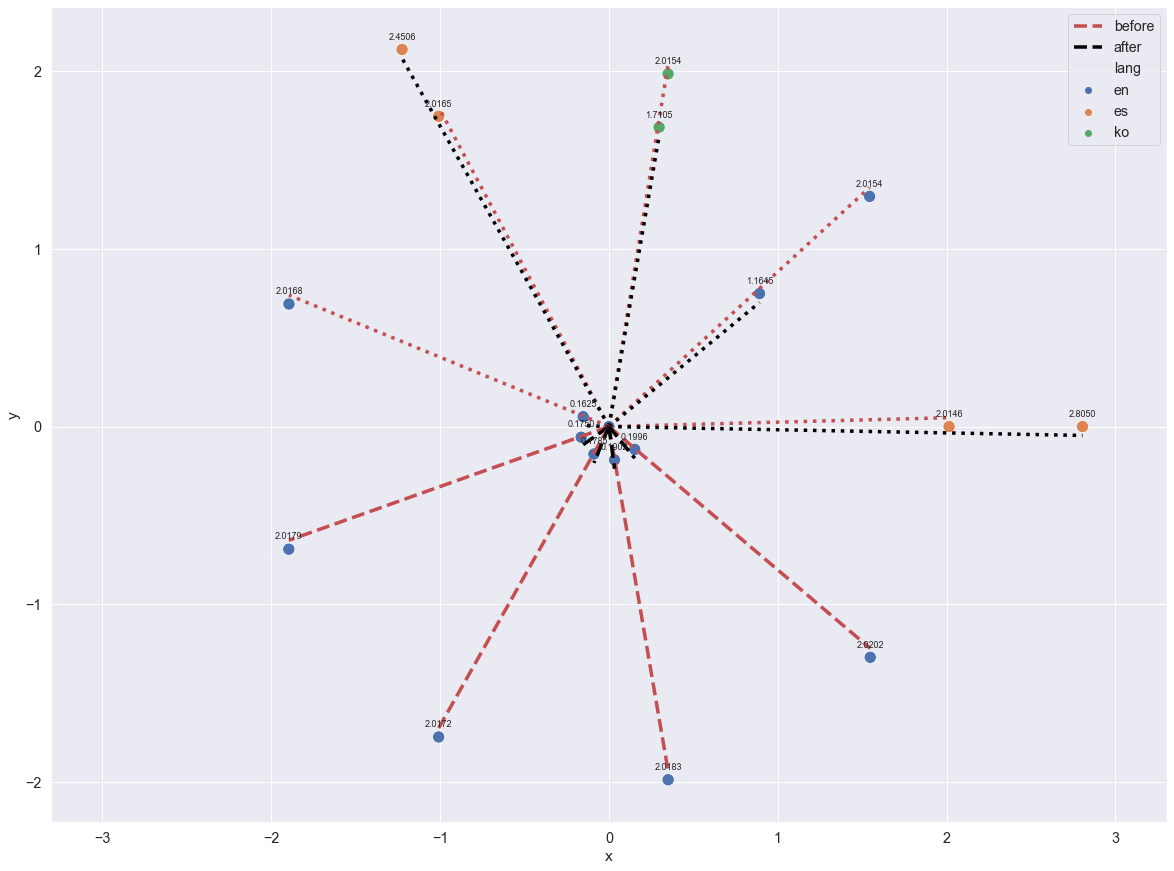

In [301]:
plot_recommendations(merged_rec, song_sample_2, 5)

## Testing Samples (with more songs and different languages)

### 1. Comparing Results between alpha = 0 and alpha = 1

### Alpha 0

In [358]:
## justin bieber - peaches (en)
sample_1_alpha_0 = df_songs_alpha_0.iloc[6]

## SCH - mannschaft (fr)
sample_2_alpha_0 = df_songs_alpha_0.iloc[16]

## dil diyan gallan (hi)
sample_3_alpha_0 = df_songs_alpha_0.iloc[474]

### Alpha 1

In [357]:
## justin bieber - peaches (en)
sample_1_alpha_1 = df_songs_alpha_1.iloc[6]

## SCH - mannschaft (fr)
sample_2_alpha_1 = df_songs_alpha_1.iloc[16]

## dil diyan gallan (hi)
sample_3_alpha_1 = df_songs_alpha_1.iloc[474]

### Alpha 0 Song Recommendations (+ different knn values)

#### Example Song 1

In [310]:
song_rec_1_k5_0 = KNearestNeighbors(df_songs_alpha_0, sample_1_alpha_0 , 5, audio_features + language_features)
song_rec_1_k10_0 = KNearestNeighbors(df_songs_alpha_0, sample_1_alpha_0 , 10, audio_features + language_features)
song_rec_1_k15_0 = KNearestNeighbors(df_songs_alpha_0, sample_1_alpha_0 , 15, audio_features + language_features)

#### Example Song 2

In [311]:
song_rec_2_k5_0 = KNearestNeighbors(df_songs_alpha_0, sample_2_alpha_0 , 5, audio_features + language_features)
song_rec_2_k10_0 = KNearestNeighbors(df_songs_alpha_0, sample_2_alpha_0 , 10, audio_features + language_features)
song_rec_2_k15_0 = KNearestNeighbors(df_songs_alpha_0, sample_2_alpha_0 , 15, audio_features + language_features)

#### Example Song 3

In [359]:
song_rec_3_k5_0 = KNearestNeighbors(df_songs_alpha_0, sample_3_alpha_0 , 5, audio_features + language_features)
song_rec_3_k10_0 = KNearestNeighbors(df_songs_alpha_0, sample_3_alpha_0 , 10, audio_features + language_features)
song_rec_3_k15_0 = KNearestNeighbors(df_songs_alpha_0, sample_3_alpha_0 , 15, audio_features + language_features)

### Alpha One Song Recommendations (+ different knn values)

#### Example Song 1

In [313]:
song_rec_1_k5_1 = KNearestNeighbors(df_songs_alpha_1, sample_1_alpha_1 , 5, audio_features + language_features)
song_rec_1_k10_1 = KNearestNeighbors(df_songs_alpha_1, sample_1_alpha_1 , 10, audio_features + language_features)
song_rec_1_k15_1 = KNearestNeighbors(df_songs_alpha_1, sample_1_alpha_1 , 15, audio_features + language_features)

#### Example Song 2

In [314]:
song_rec_2_k5_1 = KNearestNeighbors(df_songs_alpha_1, sample_2_alpha_1 , 5, audio_features + language_features)
song_rec_2_k10_1 = KNearestNeighbors(df_songs_alpha_1, sample_2_alpha_1 , 10, audio_features + language_features)
song_rec_2_k15_1 = KNearestNeighbors(df_songs_alpha_1, sample_2_alpha_1 , 15, audio_features + language_features)

#### Example Song 3

In [360]:
song_rec_3_k5_1 = KNearestNeighbors(df_songs_alpha_1, sample_3_alpha_1 , 5, audio_features + language_features)
song_rec_3_k10_1 = KNearestNeighbors(df_songs_alpha_1, sample_3_alpha_1 , 10, audio_features + language_features)
song_rec_3_k15_1 = KNearestNeighbors(df_songs_alpha_1, sample_3_alpha_1 , 15, audio_features + language_features)

### Merge all recommendations (with and without weighted language features + different knn values) 

#### Example Song 1

In [319]:
merged_rec_1_k5 = merge_recommendations(df_songs_alpha_0, df_songs_alpha_1, song_rec_1_k5_0, song_rec_1_k5_1)
merged_rec_1_k10 = merge_recommendations(df_songs_alpha_0, df_songs_alpha_1, song_rec_1_k10_0, song_rec_1_k10_1)
merged_rec_1_k15 = merge_recommendations(df_songs_alpha_0, df_songs_alpha_1, song_rec_1_k15_0, song_rec_1_k15_1)

#### Example Song 2

In [370]:
merged_rec_2_k5 = merge_recommendations(df_songs_alpha_0, df_songs_alpha_1, song_rec_2_k5_0, song_rec_2_k5_1)
merged_rec_2_k10 = merge_recommendations(df_songs_alpha_0, df_songs_alpha_1, song_rec_2_k10_0, song_rec_2_k10_1)
merged_rec_2_k15 = merge_recommendations(df_songs_alpha_0, df_songs_alpha_1, song_rec_2_k15_0, song_rec_2_k15_1)

#### Example Song 3

In [361]:
merged_rec_3_k5 = merge_recommendations(df_songs_alpha_0, df_songs_alpha_1, song_rec_3_k5_0, song_rec_3_k5_1)
merged_rec_3_k10 = merge_recommendations(df_songs_alpha_0, df_songs_alpha_1, song_rec_3_k10_0, song_rec_3_k10_1)
merged_rec_3_k15 = merge_recommendations(df_songs_alpha_0, df_songs_alpha_1, song_rec_3_k15_0, song_rec_3_k15_1)

# Recommendation Graphs


### Example Song 1: Peaches (English song)

Text(0.5, 0.98, 'Justin Bieber - Peaches (feat. Daniel Caesar & Giveon)')

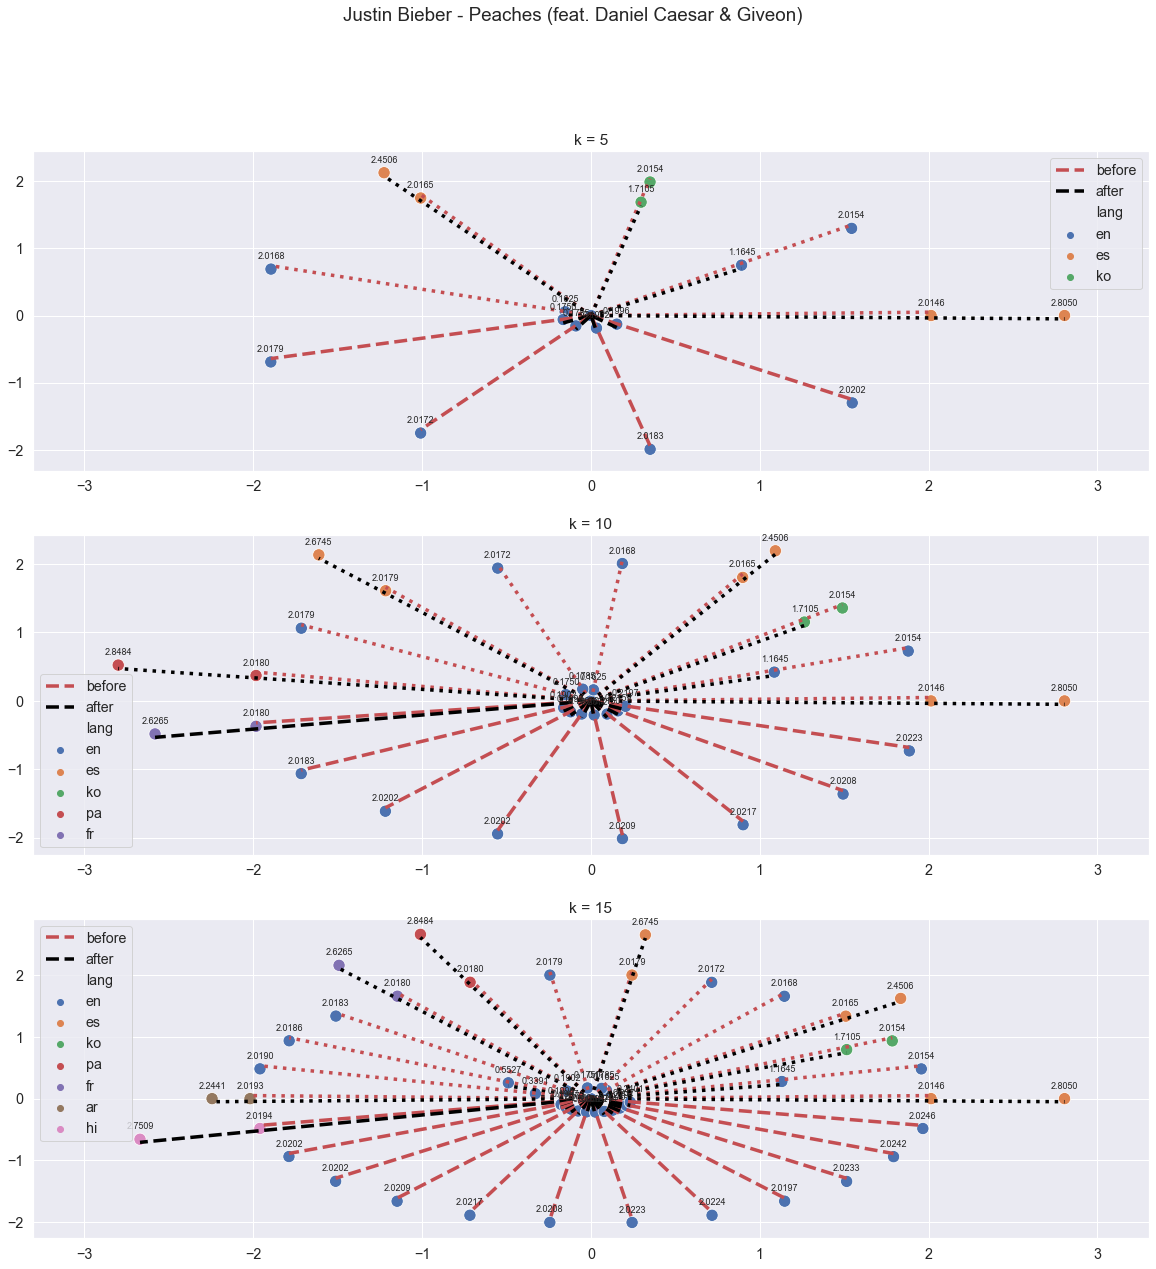

In [332]:
merged_rec_1 = [merged_rec_1_k5, merged_rec_1_k10, merged_rec_1_k15]
k = ['5', '10', '15']

for ii in range(3):
    plt.subplot(3, 1, ii + 1)
    
    plot_recommendations(merged_rec_1[ii], sample_1_alpha_1)
    
    plt.xlabel('x', visible=False)
    plt.ylabel('y', visible=False)
    plt.title(f'k = {k[ii]}')
    
plt.suptitle(sample_1_alpha_1['artist(s)'] + ' - ' + sample_1_alpha_1['track'])

### Example Song 2: Mannschaft (French song)

Text(0.5, 0.98, 'SCH - Mannschaft (feat. Freeze Corleone)')

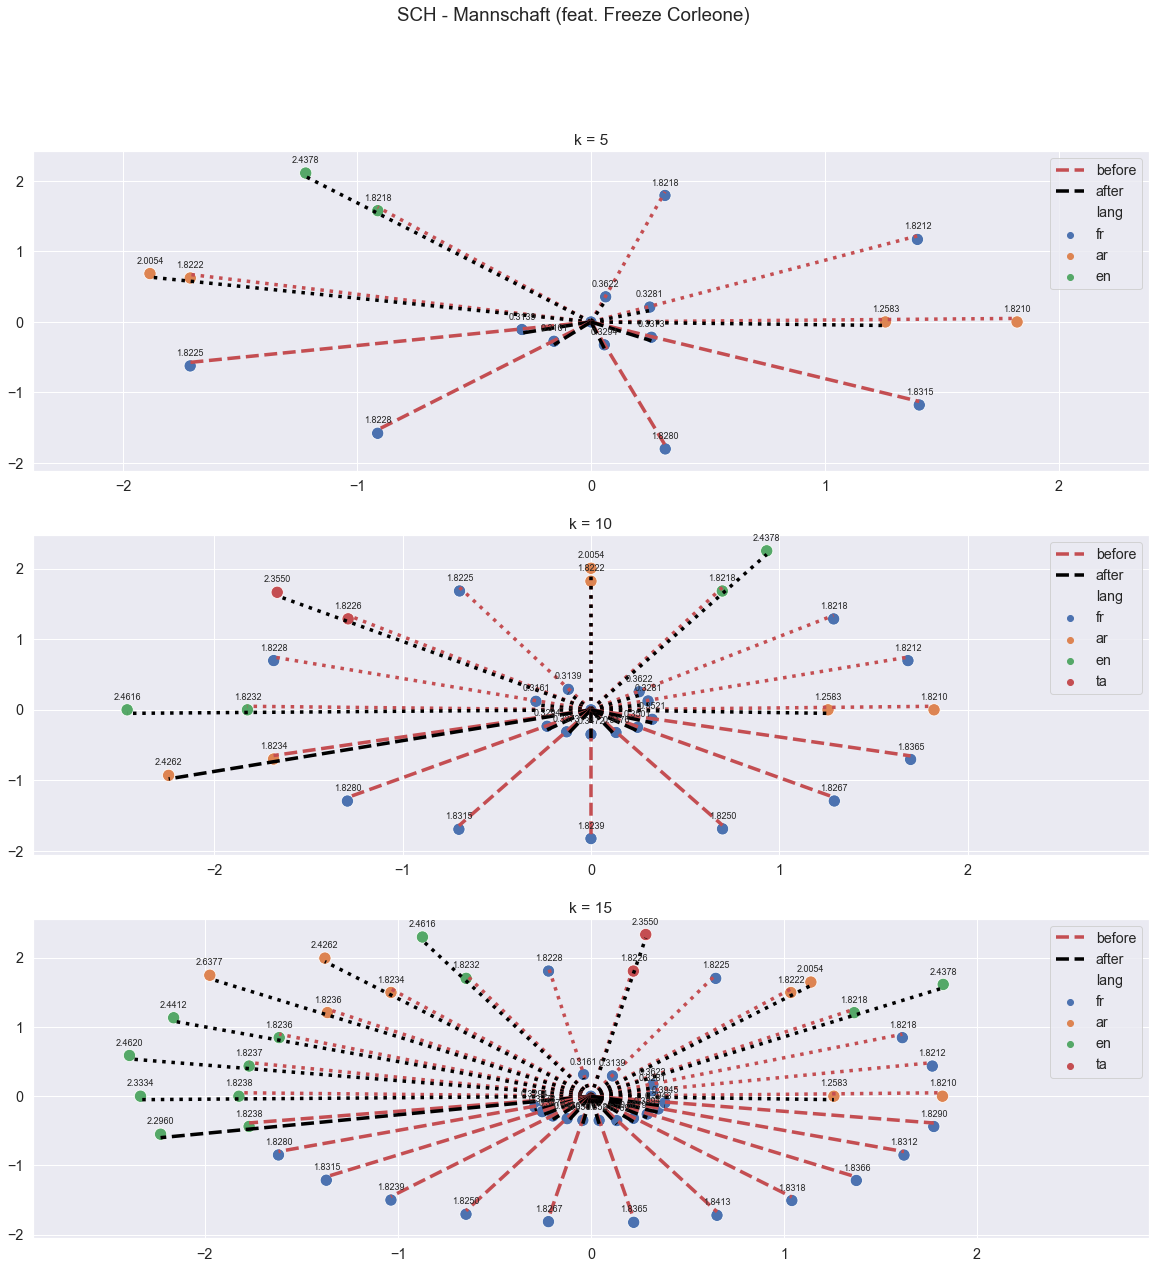

In [371]:
merged_rec_1 = [merged_rec_2_k5, merged_rec_2_k10, merged_rec_2_k15]
k = ['5', '10', '15']

for ii in range(3):
    plt.subplot(3, 1, ii + 1)
    
    plot_recommendations(merged_rec_1[ii], sample_2_alpha_1)
    
    plt.xlabel('x', visible=False)
    plt.ylabel('y', visible=False)
    plt.title(f'k = {k[ii]}')
    
plt.suptitle(sample_2_alpha_1['artist(s)'] + ' - ' + sample_2_alpha_1['track'])

### Example Song 3: Dil Diyan Gallan (Hindi song)

Text(0.5, 0.98, 'Atif Aslam - Dil Diyan Gallan')

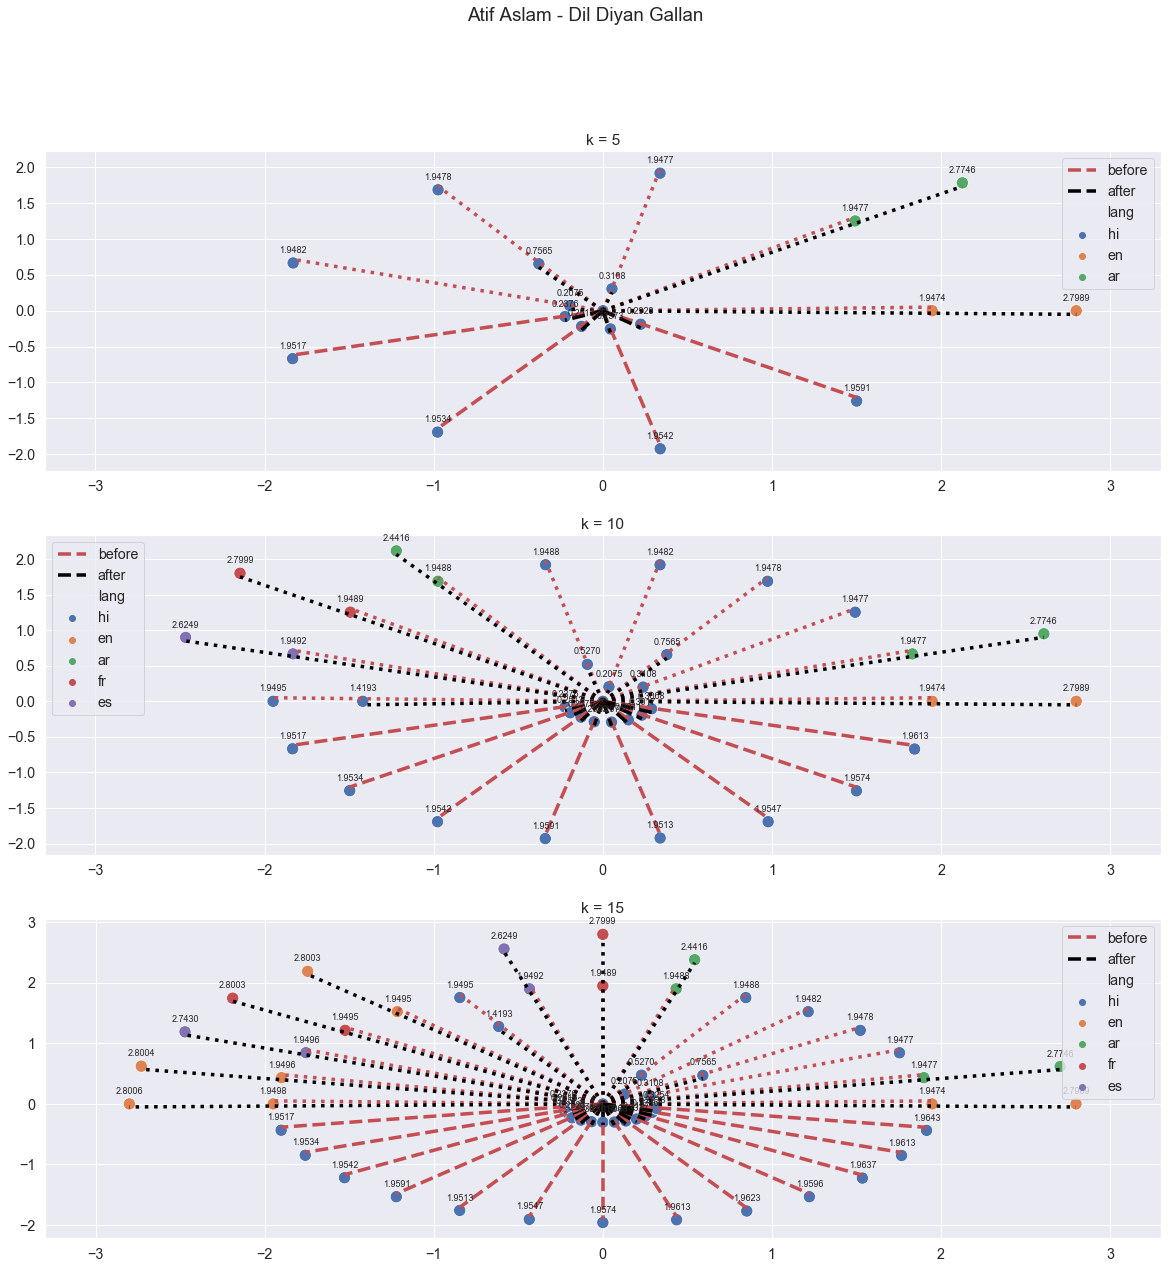

In [362]:
merged_rec_1 = [merged_rec_3_k5, merged_rec_3_k10, merged_rec_3_k15]
k = ['5', '10', '15']

for ii in range(3):
    plt.subplot(3, 1, ii + 1)
    
    plot_recommendations(merged_rec_1[ii], sample_3_alpha_1)
    
    plt.xlabel('x', visible=False)
    plt.ylabel('y', visible=False)
    plt.title(f'k = {k[ii]}')
    
plt.suptitle(sample_3_alpha_1['artist(s)'] + ' - ' + sample_3_alpha_1['track'])

## Recommendations with alpha values of 0.5 and 1

### Sample songs

In [364]:
## justin bieber - peaches (en)
sample_1_alpha_half = df_songs_alpha_half.iloc[6]

## SCH - mannschaft (fr)
sample_2_alpha_half = df_songs_alpha_half.iloc[16]

## dil diyan gallan
sample_3_alpha_half = df_songs_alpha_half.iloc[474]

#### Example Song 1: Peaches (English song)

In [343]:
song_rec_1_k5_half = KNearestNeighbors(df_songs_alpha_half, sample_1_alpha_half , 5, audio_features + language_features)
song_rec_1_k10_half = KNearestNeighbors(df_songs_alpha_half, sample_1_alpha_half , 10, audio_features + language_features)
song_rec_1_k15_half = KNearestNeighbors(df_songs_alpha_half, sample_1_alpha_half , 15, audio_features + language_features)

#### Example Song 2: Mannschaft (French song)

In [344]:
song_rec_2_k5_half = KNearestNeighbors(df_songs_alpha_half, sample_2_alpha_half , 5, audio_features + language_features)
song_rec_2_k10_half = KNearestNeighbors(df_songs_alpha_half, sample_2_alpha_half , 10, audio_features + language_features)
song_rec_2_k15_half = KNearestNeighbors(df_songs_alpha_half, sample_2_alpha_half , 15, audio_features + language_features)

#### Example Song 3: Dil Diyan Gallan (Hindi song)

In [365]:
song_rec_3_k5_half = KNearestNeighbors(df_songs_alpha_half, sample_3_alpha_half , 5, audio_features + language_features)
song_rec_3_k10_half = KNearestNeighbors(df_songs_alpha_half, sample_3_alpha_half , 10, audio_features + language_features)
song_rec_3_k15_half = KNearestNeighbors(df_songs_alpha_half, sample_3_alpha_half , 15, audio_features + language_features)

### Merge all recommendations (with and without weighted language features + different knn values) 

#### Example Song 1: Peaches (English song)

In [346]:
merged_rec_1_k5_1 = merge_recommendations(df_songs_alpha_half, df_songs_alpha_1, song_rec_1_k5_half, song_rec_1_k5_1)
merged_rec_1_k10_1 = merge_recommendations(df_songs_alpha_half, df_songs_alpha_1, song_rec_1_k10_half, song_rec_1_k10_1)
merged_rec_1_k15_1 = merge_recommendations(df_songs_alpha_half, df_songs_alpha_1, song_rec_1_k15_half, song_rec_1_k15_1)

#### Example Song 2: Mannschaft (French song)

In [347]:
merged_rec_2_k5_1 = merge_recommendations(df_songs_alpha_half, df_songs_alpha_1, song_rec_2_k10_half, song_rec_2_k10_1)
merged_rec_2_k10_1 = merge_recommendations(df_songs_alpha_half, df_songs_alpha_1, song_rec_2_k10_half, song_rec_2_k10_1)
merged_rec_2_k15_1 = merge_recommendations(df_songs_alpha_half, df_songs_alpha_1, song_rec_2_k10_half, song_rec_2_k10_1)

#### Example Song 3: Dil Diyan Gallan (Hindi song)

In [367]:
merged_rec_3_k5_1 = merge_recommendations(df_songs_alpha_half, df_songs_alpha_1, song_rec_3_k5_half, song_rec_3_k5_1)
merged_rec_3_k10_1 = merge_recommendations(df_songs_alpha_half, df_songs_alpha_1, song_rec_3_k10_half, song_rec_3_k10_1)
merged_rec_3_k15_1 = merge_recommendations(df_songs_alpha_half, df_songs_alpha_1, song_rec_3_k15_half, song_rec_3_k15_1)

### Visualize Recommendations

#### English Song Graph of 5, 10, 15 Neighbors of Alpha 0.5 and Alpha 1

Text(0.5, 0.98, 'Justin Bieber - Peaches (feat. Daniel Caesar & Giveon)')

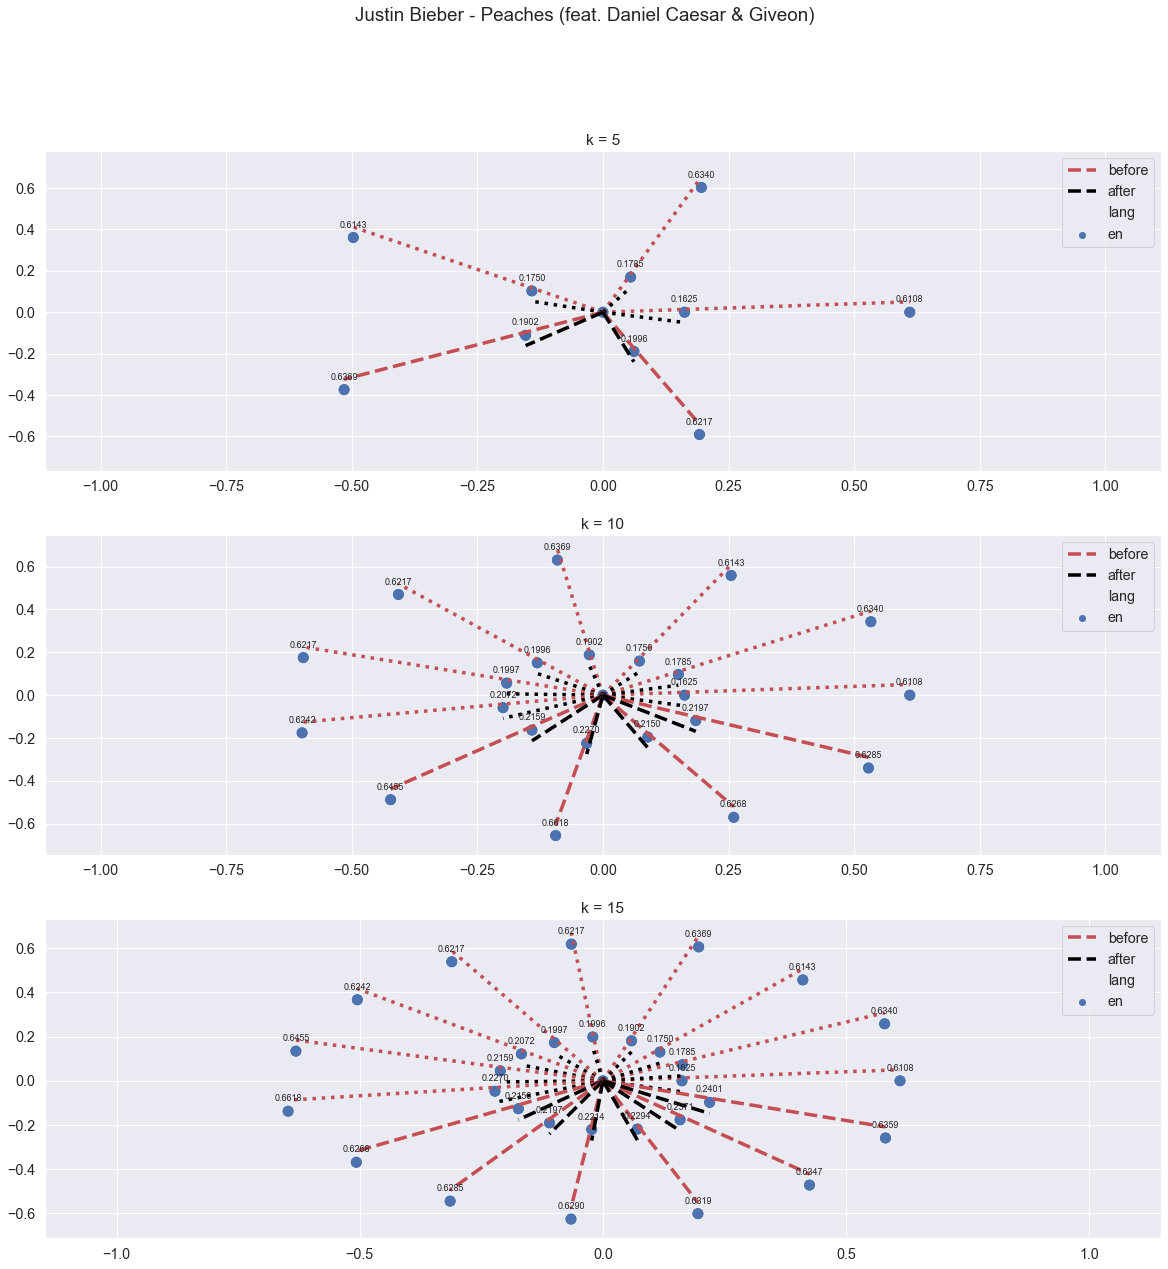

In [349]:
merged_rec_1_1 = [merged_rec_1_k5_1, merged_rec_1_k10_1, merged_rec_1_k15_1]
k = ['5', '10', '15']

for ii in range(3):
    plt.subplot(3, 1, ii + 1)
    
    plot_recommendations(merged_rec_1_1[ii], sample_1_alpha_1)
    
    plt.xlabel('x', visible=False)
    plt.ylabel('y', visible=False)
    plt.title(f'k = {k[ii]}')
    
plt.suptitle(sample_1_alpha_1['artist(s)'] + ' - ' + sample_1_alpha_1['track'])

#### French Song Graph of 5, 10, 15 Neighbors of Alpha 0.5 and Alpha 1

Text(0.5, 0.98, 'SCH - Mannschaft (feat. Freeze Corleone)')

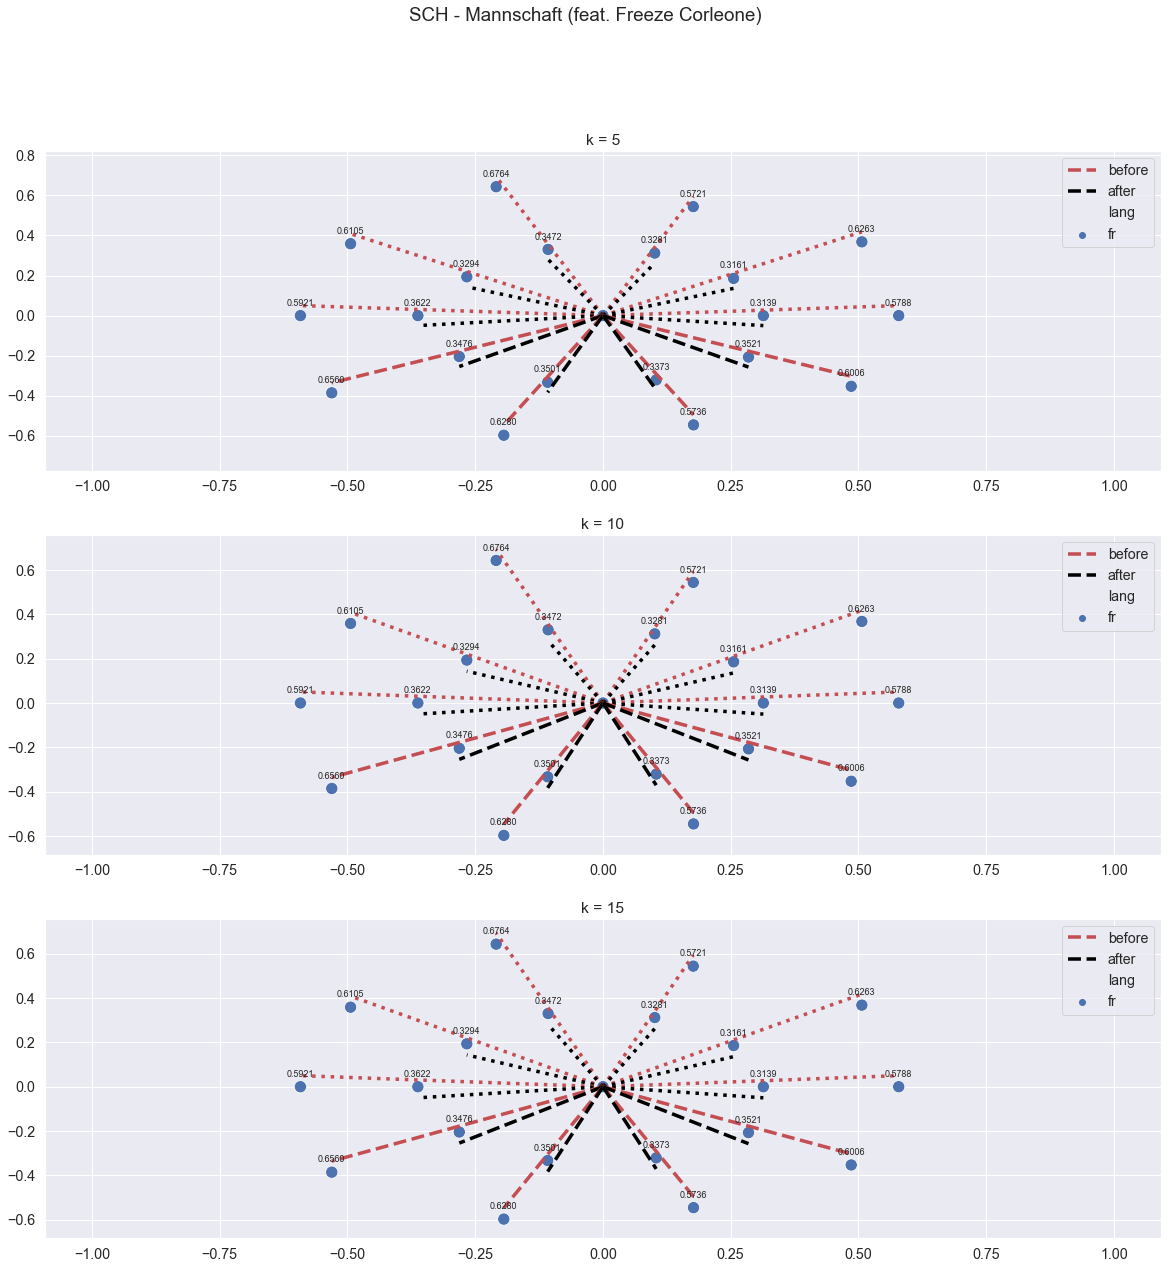

In [350]:
merged_rec_2_1 = [merged_rec_2_k5_1, merged_rec_2_k10_1, merged_rec_2_k15_1]
k = ['5', '10', '15']

for ii in range(3):
    plt.subplot(3, 1, ii + 1)
    
    plot_recommendations(merged_rec_2_1[ii], sample_2_alpha_1)
    
    plt.xlabel('x', visible=False)
    plt.ylabel('y', visible=False)
    plt.title(f'k = {k[ii]}')
    
plt.suptitle(sample_2_alpha_1['artist(s)'] + ' - ' + sample_2_alpha_1['track'])

#### Hindi Song Graph of 5, 10, 15 Neighbors of Alpha 0.5 and Alpha 1


Text(0.5, 0.98, 'Atif Aslam - Dil Diyan Gallan')

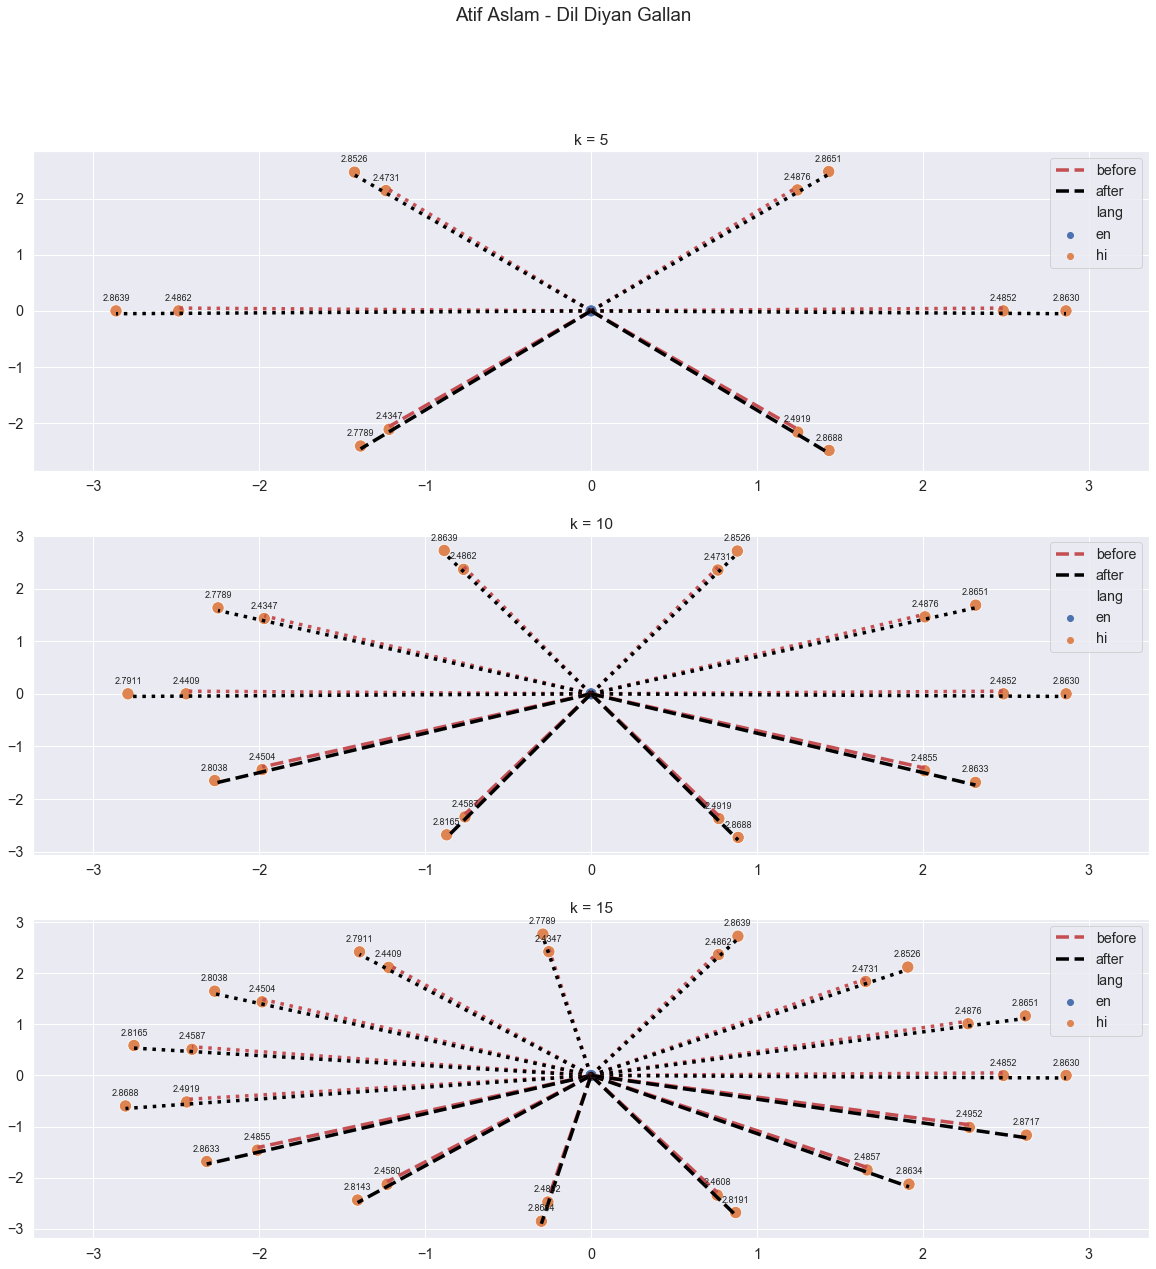

In [368]:
merged_rec_3_1 = [merged_rec_3_k5_1, merged_rec_3_k10_1, merged_rec_3_k15_1]
k = ['5', '10', '15']

for ii in range(3):
    plt.subplot(3, 1, ii + 1)
    
    plot_recommendations(merged_rec_3_1[ii], sample_1_alpha_1)
    
    plt.xlabel('x', visible=False)
    plt.ylabel('y', visible=False)
    plt.title(f'k = {k[ii]}')
    
plt.suptitle(sample_3_alpha_1['artist(s)'] + ' - ' + sample_3_alpha_1['track'])

# Discussion
<a id='Discussion'></a>


## Interpreting results
As mentioned earlier, spotify has no way to filter or recommend songs based on language. The result of our application is that you now could filter out songs based on language and your favorite type of music as well. Our results indicate that as you increase the alpha value, the songs tend to move away if the language is different from the sample song and move towards the sample point if the language is the same. This shows that if you toggle the alpha value, you are able to filter out songs based on the language of your preference, which is something that spotify does not allow us to do yet.

To visualize this, we plotted the graphs and clearly indicating lines before (alpha 0) and after (alpha 1) and we are able to observe the eucledian distance changes. A trend that we see amongst all of the graphs plotted above is that when you increase the alpha value, the recommended points that are of the same language as the sample point move closer and the the recommended points that are in different language move away from the sample point.

To thoroughly display this trend, we change the alpha values from 0 to 0.5 to 1 to display the movements of the points more closely and see how our model is able to recommend songs the more we increase the language importance.

The final thing we wanted to achieve with this project was to generate a playlist of a specified length containing these recommended songs. We used the KNN classifier to do so since now, the amount of neighbors that you want will directly recommend you that amount of songs and so you now have your playlist with similar songs depending on audio features and language!

#### Limitations
A main limiation of our project is that we are having to use multiple APIs to create our dataset and so we also have to face all the limitations that come along with each of them.

First of all, we used the genius API to get the lyrics of each of the songs and a problem we faced was that there were roughly 20 songs that didn't have a genius page to get the lyrics from and therefore we had to remove those songs. With an even larger and more diverse dataset, this problem would limit us very much from expanding our results as much as we want to.

Second of all, we relied heavily on the google translate API for the languages of the songs, and so we face all the limitations that come with it such as inaccurate results which means our model could accidentally classify songs incorrectly in the wrong language basket which would therefore mean the recommendations are also incorrect, as we increase language importance.

Additionally, our model only contains 1000 songs and the languages aren't as varied as we could potentially make it to be to produce even more accurate recommendations. Therefore, this implies that there could be many other songs that are better fit for the sample point, but having such a low number of songs in the database us from finding the best possible recommendations from user.

Since we are also relying heavily on the spotify API to give us the audio features of songs, we may not be able to extend our database as much since we are limited to only songs available in spotify and so our model would be able to recommend much lower songs because of this limitation. 

#### Future Extension
We could extend the project by using a larger database from more countries that encapsulates all the songs on a streaming service like Spotify. 

Since there are roughly 6,500 songs in the world, we aren't able to make recommendations for all the different languages since spotify doesn't contain songs of every language in the world. Since our model only identifies songs of the same exact language, a future extension could be trying to determine similarities between languages and recommending songs that are not just the exact same language, but also similar languages. For example, hindi and urdu are very similar languages so having a model where you are able to return urdu songs if the sample is hindi by detecting that the songs are similar, would make our project much more powerful.

## Takeaway

#### Ethical Considerations
The main ethical concern would be that **the song language recommender could be used to push an agenda related to specific languages being listened to.**

An issue such as this would arise since the recommender prioritizes languages that have larger databases.

For example, if this recommender fell into the hands of isolationists, they could train it on only songs that fall into the language or culture they want to promote. This would allow them to accomplish their goal of cutting off exposure to other languages or cultures by means of music. 

Another example would be if a publishing company wanted to push a certain language of song to users. They could train the recommender to focus on a certain language and adjust the features to only recommend songs of their desired language. 

A more benign consequence of this recommender would be that endangered languages would be harder to identify and represent, as the recommender would not be able to recommend songs solely of that language to a user.

To ensure the recommender does as much good as possible while minimizing the harm done, we could look into more Machine Learning techniques that would avoid weight specific biasing. 

